In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
index=1
Read="125_1_ethanol.csv"
data=pd.read_csv(Read,skiprows=44).values
Volts=data[3:,3]
Time=data[3:,1]
Amps=data[3:,2]

Boucle=np.arange(1,7,1)
StockVolts=np.zeros((len(Boucle),len(Volts)))
StockAmps=np.zeros((len(Boucle),len(Amps)))
StockTime=np.zeros((len(Boucle),len(Time)))
for i in Boucle:
    Read="125_"+str(i)+"_ethanol.csv"
    data=pd.read_csv(Read,skiprows=44).values
    Volts=data[3:,3]
    Time=data[3:,1]
    Amps=data[3:,2]
    Volts1 = Volts.astype(np.float)
    Time1= Time.astype(np.float)
    Amps1= Amps.astype(np.float)
    StockVolts[i-1]=Volts1
    StockAmps[i-1]=Amps1
    StockTime[i-1]=Time1

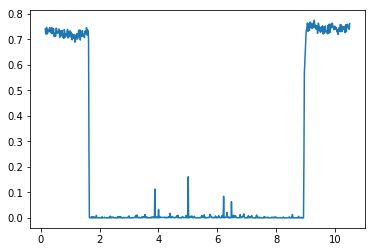

In [3]:
plt.plot(StockTime[1,10:750],StockVolts[1,10:750])

In [4]:
StockTime1=np.zeros((len(Boucle),len(StockTime[0,10:750])))
StockVolts1=np.zeros((len(Boucle),len(StockVolts[0,10:750])))
StockAmps1=np.zeros((len(Boucle),len(StockAmps[0,10:750])))
for i in Boucle:
    StockTime1[i-1]=StockTime[i-1,10:750]
    StockAmps1[i-1]=StockAmps[i-1,10:750]
    StockVolts1[i-1]=StockVolts[i-1,10:750]
StockTime=StockTime1
StockAmps=StockAmps1
StockVolts=StockVolts1

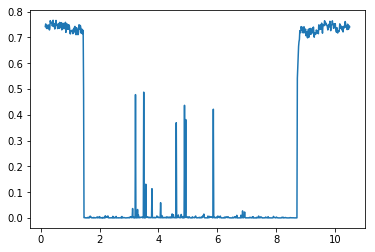

In [5]:
plt.plot(StockTime[0],StockVolts[0])

In [6]:
IndexCutFirst=np.zeros(len(Boucle))
IndexCutLast=np.zeros(len(Boucle))
for j in Boucle:
    for i in np.arange(0,len(StockVolts[j-1]),1):
        if StockVolts[j-1,i] < 0.2:
            First=i
            break;

    for i in np.flip(np.arange(0,len(StockVolts[j-1]),1)):
        if StockVolts[j-1,i] < 0.2:
            Last=i
            break;
    IndexCutFirst[j-1]=First
    IndexCutLast[j-1]=Last
    print(Last-First)
Largeurmin=np.min(IndexCutLast-IndexCutFirst)

StockVoltsShunt=np.zeros((len(Boucle),int(Largeurmin)))
StockTimeShunt=np.zeros((len(Boucle),int(Largeurmin)))
StockAmpsShunt=np.zeros((len(Boucle),int(Largeurmin)))
for i in Boucle:
    A=int(IndexCutFirst[i-1])
    B=int(IndexCutFirst[i-1]+int(Largeurmin))
    StockVoltsShunt[i-1]=StockVolts[i-1,A:B]
    StockTimeShunt[i-1]=StockTime[i-1,A:B]
    StockAmpsShunt[i-1]=StockAmps[i-1,A:B]

517
520
525
525
531
535


Tout les Shunts sont stockés dans StockVoltsShunt et font tous la même taille

In [7]:
MinTemps=np.min(StockTimeShunt[:,-1]) #Prend le maximum de la dernière valeur
TempsTh=np.linspace(0,int(MinTemps),len(StockVoltsShunt[0])) # Vecteur temps théorique pour simplifier 

Pas=MinTemps/len(StockVoltsShunt[0])
Decalage=1 # Decalage en seconde de chaque courbe
PasSeconde=Decalage/Pas #Nombre de pas pour faire environ 1 seconde

NombreCourbe=6
#On rajoute 6 secondes à droite
TempsSupl=np.linspace(int(MinTemps),int(MinTemps)+(NombreCourbe-1)*Decalage,(NombreCourbe-1)*int(PasSeconde))
VoltsSupl=np.ones(len(TempsSupl))

#6*int(PasSeconde) sert à garder environ le même pas 
##################################################################
LengthSVS=len(StockVoltsShunt[0])+len(VoltsSupl)
LengthSTS=len(TempsTh)+len(TempsSupl)
SVS=np.zeros((len(Boucle),LengthSVS))
STS=np.zeros((len(Boucle),LengthSTS))
##################################################################



SVS[0]=np.concatenate((StockVoltsShunt[0],VoltsSupl),axis=0)
STS[0]=np.concatenate((TempsTh,TempsSupl),axis=0)

for i in [0,1,2,3, 4,5]:
    TempsTh=np.linspace(i*Decalage,int(MinTemps)+i*Decalage,len(StockVoltsShunt[0]))
    TempsSuplDebut=np.linspace(0,i*Decalage,i*int(PasSeconde))
    TempsSuplFin=np.linspace(int(MinTemps)+i*Decalage,int(MinTemps)+i*Decalage+((NombreCourbe-1)-i)*Decalage,((NombreCourbe-1)-i)*int(PasSeconde))
    VoltsSuplDebut=np.ones(len(TempsSuplDebut))
    VoltsSuplFin=np.ones(len(TempsSuplFin))

    SVS[i]=np.concatenate((VoltsSuplDebut,StockVoltsShunt[i],VoltsSuplFin),axis=0)
    STS[i]=np.concatenate((TempsSuplDebut,TempsTh,TempsSuplFin),axis=0)

IndexError: index 6 is out of bounds for axis 0 with size 6

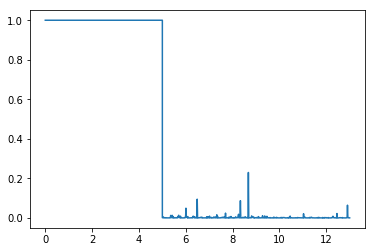

In [287]:
plt.plot(STS[5],SVS[5])

In [288]:
Zeq=1/SVS[0]+1/SVS[1]+1/SVS[2]+1/SVS[3]+1/SVS[4]+1/SVS[5]

In [289]:
ShuntEssieux=1/Zeq

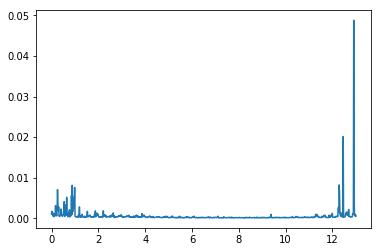

In [290]:
plt.plot(STS[5],ShuntEssieux)

In [8]:
StockTempsDebut=np.zeros(len(np.arange(1,NombreCourbe+1,1)))
StockTempsFin=np.zeros(len(np.arange(1,NombreCourbe+1,1)))
for i in np.arange(0,NombreCourbe,1):
    TempsTh=np.linspace(i*Decalage,int(MinTemps)+i*Decalage,len(StockVoltsShunt[0]))
    TempsSuplDebut=np.linspace(0,i*Decalage,i*int(PasSeconde))
    TempsSuplFin=np.linspace(int(MinTemps)+i*Decalage,int(MinTemps)+i*Decalage+((NombreCourbe-1)-i)*Decalage,((NombreCourbe-1)-i)*int(PasSeconde))
    StockTempsDebut[i]=len(TempsSuplDebut)
    StockTempsFin[i]=len(TempsSuplDebut)+len(TempsTh)
    VoltsSuplDebut=np.ones(len(TempsSuplDebut))
    VoltsSuplFin=np.ones(len(TempsSuplFin))

Zeq=np.zeros(len(SVS[0]))
A=0
B=int(StockTempsDebut[1])
Zeq[0:B]=1/SVS[0,0:B]
for i in np.arange(1,NombreCourbe-1,1):
    for j in np.arange(0,i+1,1):
        A=int(StockTempsDebut[i])
        B=int(StockTempsDebut[i+1])
        Zeq[A:B]=Zeq[A:B]+1/SVS[j,A:B]
        
A=int(StockTempsDebut[-1])
B=int(StockTempsFin[0])
for j in np.arange(0,NombreCourbe,1):
    Zeq[A:B]=Zeq[A:B]+1/SVS[j,A:B]

k=0
for i in np.flip(np.arange(1,NombreCourbe-1,1)):
    for j in np.arange(k,NombreCourbe,1):
        A=int(StockTempsFin[k])
        B=int(StockTempsFin[k+1])
        Zeq[A:B]=Zeq[A:B]+1/SVS[j,A:B]
    k=k+1

A=int(StockTempsFin[-2])
Zeq[A:]=1/SVS[NombreCourbe-1,A:]

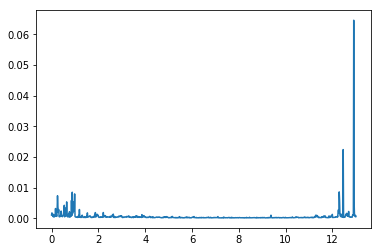

In [9]:
plt.plot(STS[5],1/Zeq)

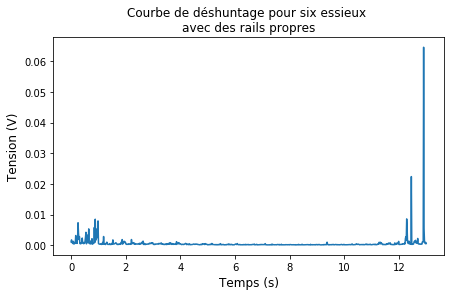

In [11]:
plt.figure(figsize=(7,4))
plt.plot(STS[5],1/Zeq)
plt.xlabel('Temps (s)',fontsize=12)
plt.ylabel('Tension (V)',fontsize=12)
plt.title("Courbe de déshuntage pour six essieux \navec des rails propres",fontsize=12)
plt.savefig('courbe_decale_final_ethanol.eps')